# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Example-Case" data-toc-modified-id="Example-Case-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example Case</a></div><div class="lev1 toc-item"><a href="#Critical-Value-(z_score)" data-toc-modified-id="Critical-Value-(z_score)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Critical Value (z_score)</a></div><div class="lev1 toc-item"><a href="#Confidence-Interval" data-toc-modified-id="Confidence-Interval-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Confidence Interval</a></div><div class="lev1 toc-item"><a href="#Result" data-toc-modified-id="Result-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Result</a></div><div class="lev1 toc-item"><a href="#Plotting-Distributions" data-toc-modified-id="Plotting-Distributions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting Distributions</a></div><div class="lev2 toc-item"><a href="#Normal-Distribution-PDF-(prob-dist-func)" data-toc-modified-id="Normal-Distribution-PDF-(prob-dist-func)-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Normal Distribution PDF (prob dist func)</a></div><div class="lev2 toc-item"><a href="#Normal-Distribution-CDF-(cumulative-dist-func)" data-toc-modified-id="Normal-Distribution-CDF-(cumulative-dist-func)-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Normal Distribution CDF (cumulative dist func)</a></div><div class="lev2 toc-item"><a href="#Students'-t-distribution" data-toc-modified-id="Students'-t-distribution-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Students' t-distribution</a></div><div class="lev1 toc-item"><a href="#Normal-distribution-vs.-t-distribution" data-toc-modified-id="Normal-distribution-vs.-t-distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Normal distribution vs. t-distribution</a></div>

# Example Case

We need to design a machine which fills cups with coffee average wt 250 gm with standard deviation 2.5 gm.

Test:
take a sample of 25 cups and find if the cup making machine is working good with 95 % confidence.


Probability distribution of Gaussian Distribution:

$$
p ( x ) = \frac { 1 } { \sqrt { 2 \pi \sigma ^ { 2 } } } e ^ { - \frac { ( x - \mu ) ^ { 2 } } { 2 \sigma ^ { 2 } } }
$$


$$
\begin{array} { | c | c | } \hline C & { z ^ { * } } \\ \hline 99 \% & { 2.576 } \\ \hline 98 \% & { 2.326 } \\ \hline 95 \% & { 1.96 } \\ \hline 90 \% & { 1.645 } \\ \hline \end{array}
$$

$$
\begin{array} { l } { \cdot \text { For a known standard deviation: } \left( \overline { x } - z ^ { * } \frac { \sigma } { \sqrt { n } } , \overline { x } + z ^ { * } \frac { \sigma } { \sqrt { n } } \right) } \\ { \cdot \text { For an unknown standard deviation: } \left( \overline { x } - t ^ { * } \frac { s } { \sqrt { n } } , \overline { x } + t ^ { * } \frac { s } { \sqrt { n } } \right) } \end{array}
$$


Probability distribution of Student's t-distribution:  
$$
f ( t ) = \frac { \Gamma \left( \frac { \nu + 1 } { 2 } \right) } { \sqrt { \nu \pi } \Gamma \left( \frac { \nu } { 2 } \right) } \left( 1 + \frac { t ^ { 2 } } { \nu } \right) ^ { - \frac { \nu + 1 } { 2 } }
$$

> If n > 30 use normal distribution instead of t-distribution.  
> z-distribution has only one parameter here, alpha  
> t-distribution has two parameters, alpha and degree of freedom  

**Find critical values**  
1. Normal distribution
```python
from scipy import stats
z_score = stats.norm.ppf(1 - half_alpha) 
# 1.96 (for 95% confidence, 5% significance)
```

2. Student's t-distribution
```python
from scipy import stats
df = n-1 # degree of freedom
half_alpha = alpha/2
q = 1 - half_alpha

t_score = stats.t.ppf(q,df) 
```

In [19]:
# given X, suppose
import numpy as np
import scipy
from scipy import stats


In [14]:
np.random.seed(100)
X =  np.random.normal(250,2.6,25)
X

array([ 245.45060977,  250.89096905,  252.99789309,  249.34366631,
        252.55143405,  251.33696899,  250.57506714,  247.21788734,
        249.50731084,  250.66300376,  248.80912984,  251.13142507,
        248.48265287,  252.12380239,  251.74907409,  249.72853103,
        248.61867102,  252.67730498,  248.86084738,  247.09237256,
        254.20935232,  254.00817345,  249.34511424,  247.80966708,
        250.4797486 ])

In [15]:
# estimator of population mean (mu_hat) is xbar.
xbar = np.mean(X)
xbar

250.22642708927032

In [16]:
# standard_err
std = np.std(X)
n = len(X)
std_err = std / np.sqrt(n)
std_err

0.43338754081127212

In [18]:
# Standardized Random Variable (Z-score)
# Here, population std is given, so we use normal dist, instead of students t-dist.
# only unknown variable is mu.
mu = 250 # given
Z = (xbar - mu) / std_err
Z

0.52245869562023051

# Critical Value (z_score)

In [21]:
alpha = 0.05 # 5% significance
half_alpha = 0.05/2 # two-tailed test

z_score = stats.norm.ppf(1 - half_alpha) # 1.96 (for 95% confidence, 5% significance)
z_score

1.959963984540054

# Confidence Interval

In [22]:
# Lower endpoint = X_bar - 1.96 * sigma/sqrt(n)
#
ci_low = xbar - z_score * std_err
ci_high = xbar + z_score * std_err

(ci_low,ci_high)

(249.37700311793185, 251.07585106060878)

# Result

As the desired value 250 of μ is within the resulted confidence interval,   
there is no reason to believe the machine is wrongly calibrated.  


NO: The parameter $\mu$ lies within this interval with probability 95%.  
YES: If we repeat in 95% of the times, mu will be calculated in the interval.

We can not use the term PROBABILTIY here.  
YES: with Confidence Level 95%, mu lies in the confidence interval.

# Plotting Distributions

## Normal Distribution PDF (prob dist func)

$$
f ( x | \mu , \sigma ^ { 2 } ) = \frac { 1 } { \sqrt { 2 \pi \sigma ^ { 2 } } } e ^ { - \frac { ( x - \mu ) ^ { 2 } } { 2 \sigma ^ { 2 } } }
$$

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

%matplotlib inline

In [24]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))

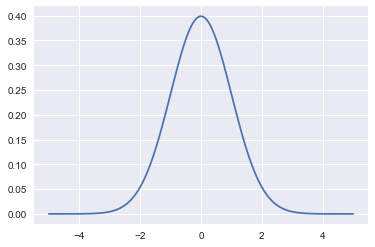

In [25]:
plt.plot(x, y)

## Normal Distribution CDF (cumulative dist func)

$$
\Phi ( x ) = \frac { 1 } { \sqrt { 2 \pi } } \int _ { - \infty } ^ { x } e ^ { - t ^ { 2 } / 2 } \mathrm { d } t
$$

In [26]:
import scipy.stats as ss

def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.norm.cdf(x, mu, sigma)
    else:
        y = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)

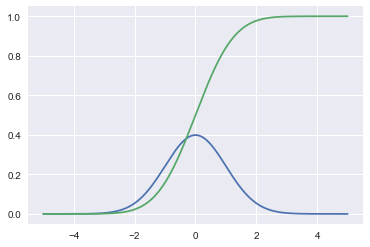

In [27]:
x = np.linspace(-5, 5, 5000)

plot_normal(x)
plot_normal(x, cdf=True)

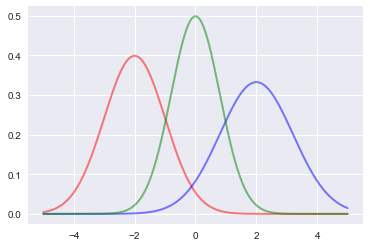

In [28]:
plot_normal(x, -2, 1, color='red', lw=2, ls='-', alpha=0.5)
plot_normal(x, 2, 1.2, color='blue', lw=2, ls='-', alpha=0.5)
plot_normal(x, 0, 0.8, color='green', lw=2, ls='-', alpha=0.5);

## Students' t-distribution

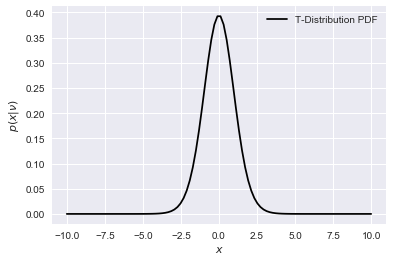

In [52]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

## Setup
n = 24          # number of samples
dof = 23        # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 2      # Number of tails 

## Calculate critical t-score
tcrit = abs(st.t.ppf(alpha/ntails, dof))
# +=2.068

xs = np.linspace(-10,10,num=100)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\nu)$')
plt.legend()

# Normal distribution vs. t-distribution

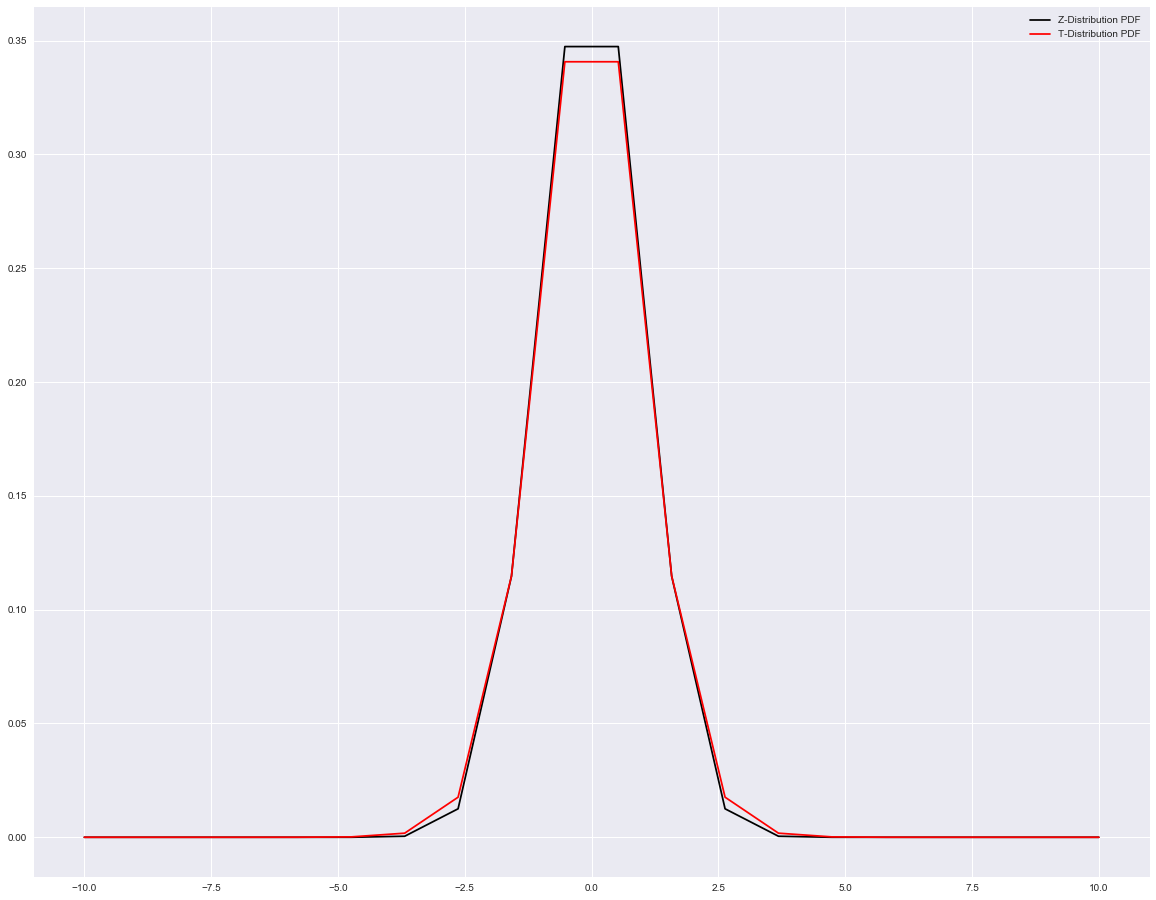

In [58]:
import scipy.stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 16)

mu = 0
sigma = 1.0

x = np.linspace(-10, 10, num=20)

# z-dist
y = scipy.stats.norm.pdf(x, mu, sigma)
plt.plot(x,y,'k',label="Z-Distribution PDF")

# t-dist
n = len(x)      # Sample size
dof = n -1      # Degree of freedom
alpha = 0.05    # Significence level
ntails = 2      # Number of tails 

tcrit = abs(st.t.ppf(alpha/ntails, dof))
plt.plot(x, st.t.pdf(x,dof), 'r', label="T-Distribution PDF")
plt.legend()